<a href="https://colab.research.google.com/github/hardiksraja/DataScience_Learning/blob/master/Stats_ML_Linkage/Cramer_s_V_Test_Categorical_association.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cramer's V test is used to calculate strength between two categorical values.

It is similar to pearson's correlation coefficient which is used to identify the correlation between 2 continuous variables.

Cramer's V Test is an extension of Chi2 test.

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
churn_master_df = pd.read_csv('https://raw.githubusercontent.com/hardiksraja/DataScience_Learning/master/Stats_ML_Linkage/datasets/churn_data_st.csv')

In [0]:
churn_df = churn_master_df.copy()

In [5]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [8]:
churn_df.shape

(7043, 10)

Here we will use contract,gender and paperless billing columns.

**Contract** - What kind of contract the end user has for telecom company.

In [9]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [11]:
churn_df.corr() # only shows correlation output of all the numeric variables

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,-0.090899,0.220173,0.100795
tenure,0.016567,1.000000,0.508526,0.247900,0.826066
ServiceCount,-0.090899,0.508526,1.000000,0.041463,0.443768
MonthlyCharges,0.220173,0.247900,0.041463,1.000000,0.650964
TotalCharges,0.100795,0.826066,0.443768,0.650964,1.000000


In [13]:
churn_df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

AttributeError: ignored

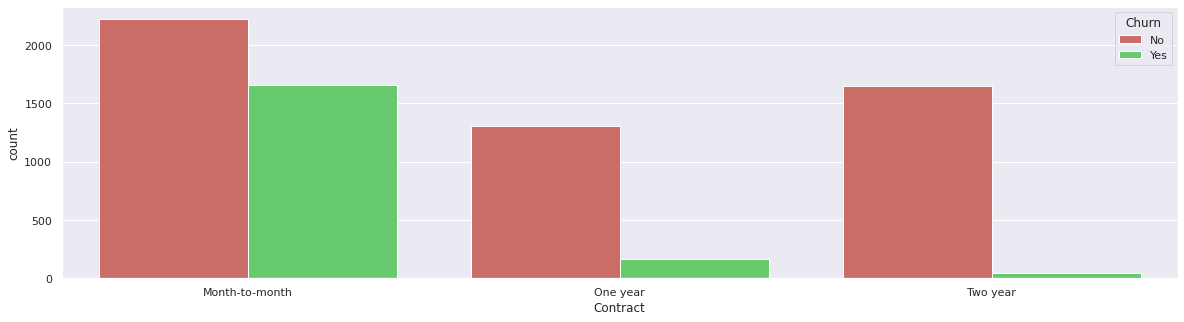

In [14]:
# sns.set(style="darkgrid")
# sns.set_palette("hls",3)
# fig,ax = plt.subplots(figsize=(20,5))
# ax=sns.countplot(x="Contract",hue="Churn",data=churn_df)

# for p in ax.patches:
#   height=p.get_height()
#   ax.text(p.get_x()+p.get_width()/2.,
#           height+3,
#           '{:1.2f}'.format(height/churn_df.shape[0]),
#           ha ='center')
  

sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(20,5))
ax=sns.countplot(x="Contract", hue="Churn", data=churn_df)

for p in ax.patches:
  height=p.height()
  ax.text(p.get_x()+p.get_width()/2.,
          height+3,
          '{:1.2f}'.format(height/churn_df.shape[0]),
          ha='center')


Green is Churn Yes:
Red is Churn No:

Month to month cotract has highest number of churn. Almost 40% churn.
There seems to be signficance relationship between these variables.

----------------------------------------
**Chi-Squared Statistics :**

X^2 = sum((Observed -Expected)^2/Expected)

Chi-2 is hard to interpret. It only shows the signifiance of the relationship but it  does not show the strength of the relationship.

Value of X^2 can become very large if there are too many categories because it does not normalize it.

------------------------------------------

**Cramer's V Test:**

V= sqrt(chi2/(n*(min(C,R)-1))

- n = Number fo samples/rows
- C = Columns count
- R = Rows count

Here we have 2 rows and 3 columns.

Cramer's V Test normalizes the large values of X^2. Value lies between 0 and 1.


Input to a Chi-squared is a contingency table.

Contingency Table is  used to summarize the relationship categorical values.

### **Chi-2 Test**

In [18]:
pd.crosstab(index=churn_df['Contract'],columns=churn_df['Churn'], margins=True)

Churn,No,Yes,All
Contract,,,
Month-to-month,2220,1655,3875
One year,1307,166,1473
Two year,1647,48,1695
All,5174,1869,7043


In [0]:
churn_contract_ct = pd.crosstab(index=churn_df['Contract'],columns=churn_df['Churn'])

In [21]:
churn_contract_ct

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [22]:
churn_contract_ct.iloc[0].values

array([2220, 1655])

In [0]:
from scipy import stats

chi2,p,dof,_=stats.chi2_contingency([churn_contract_ct.iloc[0].values,churn_contract_ct.iloc[1].values,churn_contract_ct.iloc[2].values])

In [25]:
print ('chi-2 :', chi2)
print ('p-values :', p)
print ('Degree of freedom :', dof) # three categories hence 3-1 = 2


chi-2 : 1184.5965720837926
p-values : 5.863038300673391e-258
Degree of freedom : 2


### **Cramer's V Test** - Can be used for more than 2X2 Table

V= sqrt(chi2/(n*(min(C,R)-1)) 

Phi Coeff = sqrt(chi2/(n)) <------------- Another Statistical Test used for 2X2 table

In [26]:
np.sqrt(chi2/(churn_df.shape[0]*1))

0.4101156965761409

Here the relationship is close to 1.
But in real world, we use multiple categorical varaibles so finally conclude on the strength of the relationship.

We comapre the strength of multiple categorical relationship.



In [27]:
churn_df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

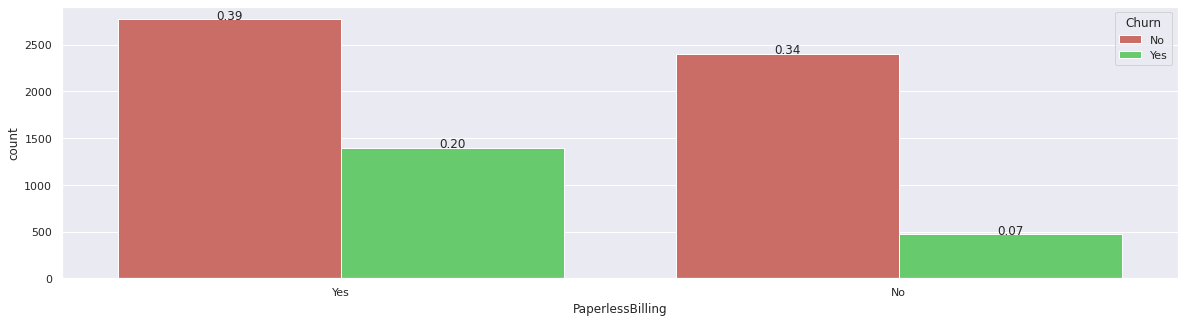

In [28]:
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig,ax = plt.subplots(figsize=(20,5))
ax=sns.countplot(x="PaperlessBilling",hue="Churn",data=churn_df)

for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
          height+3,
          '{:1.2f}'.format(height/churn_df.shape[0]),
          ha ='center')


In [0]:
churn_paper_ct = pd.crosstab(index=churn_df['PaperlessBilling'],columns=churn_df['Churn'])

In [30]:
churn_paper_ct

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [0]:
from scipy import stats

chi2 , p , dof , _ = stats.chi2_contingency([churn_paper_ct.iloc[0].values,churn_paper_ct.iloc[1].values])

In [32]:
print ('chi-2 :', chi2)
print ('p-values :', p)
print ('Degree of freedom :', dof) # three categories hence 3-1 = 2


chi-2 : 258.27764906707307
p-values : 4.073354668665985e-58
Degree of freedom : 1


In [33]:
np.sqrt(chi2/(churn_df.shape[0]*1))

0.19149814355338285

This shows there is some significance but not very high significance

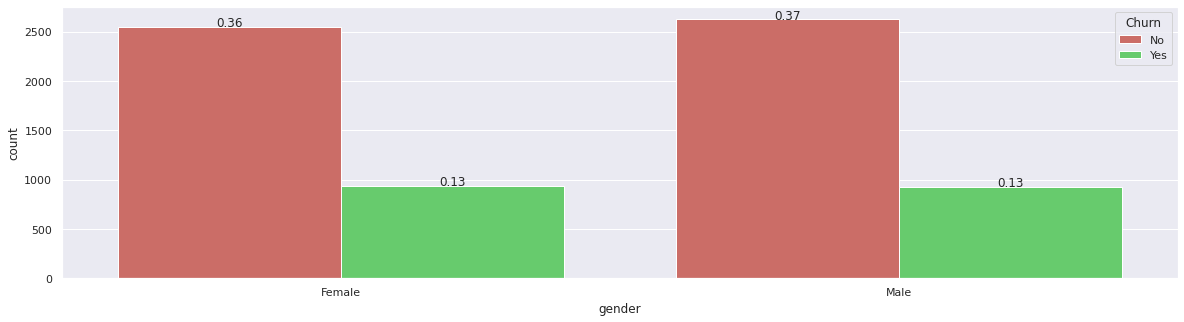

In [34]:
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig,ax = plt.subplots(figsize=(20,5))
ax=sns.countplot(x="gender",hue="Churn",data=churn_df)

for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
          height+3,
          '{:1.2f}'.format(height/churn_df.shape[0]),
          ha ='center')


In [0]:
churn_gender_ct=pd.crosstab(index=churn_df['gender'],columns=churn_df['Churn'])

In [36]:
churn_gender_ct

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [0]:
chi2 , p , dof , _ = stats.chi2_contingency([churn_gender_ct.iloc[0].values,churn_gender_ct.iloc[1].values])

In [38]:
print('chi2 :' ,chi2)
print('P-value :' ,chi2)
print('Degree of Freedom :' ,chi2)

chi2 : 0.4840828822091383
P-value : 0.4840828822091383
Degree of Freedom : 0.4840828822091383


In [39]:
np.sqrt(chi2/churn_df.shape[0])

0.008290505631771371

Here the gender column is not significant as we failed to reject the null hypothesis. Since p-values is large compared to the alpha.

Also, the cramer's V value is also very low.